# Calculating Portfolio Returns
#### PORTFOLIO RETURN FORMULA:

<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/return.JPG?raw=true">

* R<sub>P </sub> : Portfolio return
* R<sub> an</sub> : Return for asset n
* w<sub> an</sub> : Weight for asset n

## Equally Weighted Portfolios in Python
- An ideal strategy should beat the equal weighted portfolio returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Finance/Big9Returns2017.csv'

In [3]:
StockReturns = pd.read_csv(url, parse_dates=['Date'],index_col='Date')

In [4]:
StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


- Suppose, Our firm decided that we should have a portfolio with these stocks but with different weights as follows:

<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/Stocksallocation.JPG?raw=true">



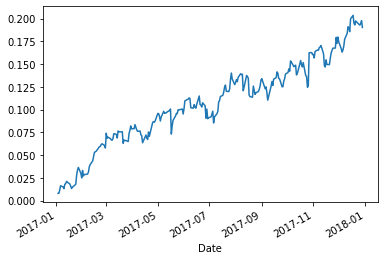

In [5]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11,0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns*portfolio_weights

'''WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)
Can also be used, but when we have broadcasting, use it :)'''

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
# This cumprod is becuase a 1 invested at t0 will grow with that facror of return
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

Beautiful! And not a bad portfolio, either...Let's compare with equal weighted portfolio

In [6]:
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.ones(9)/9

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = (StockReturns.iloc[:,:-1]*portfolio_weights_ew).sum(axis=1)
#
CumulativeReturns_EW = ((1+StockReturns["Portfolio_EW"]).cumprod()-1)

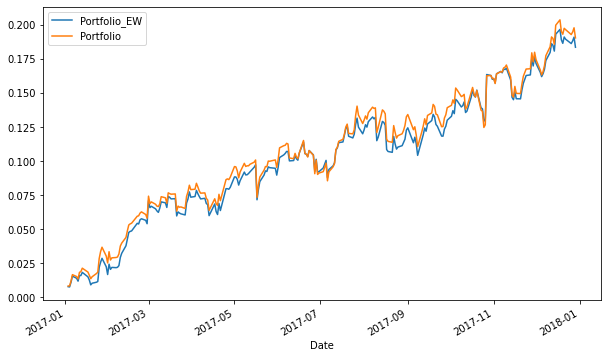

In [7]:
figure =plt.figure(figsize=(10,6))
CumulativeReturns_EW.plot(legend='EW')
CumulativeReturns.plot(legend=True)

## Market-cap weighted portfolios
Conversely, when large companies are doing well, market capitalization, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap

- Below is a table of the market capitalizations of the companies in your portfolio just before January 2017:
<img src ="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/Mcap2017.JPG?raw=true">

In [8]:
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
#
CumulativeReturns_MCap = ((1+StockReturns["Portfolio_MCap"]).cumprod()-1)

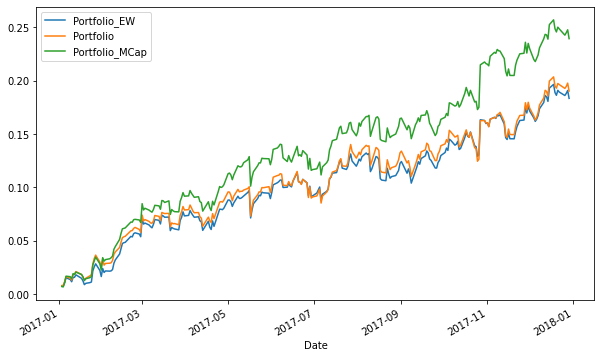

In [9]:
figure =plt.figure(figsize=(10,6))
CumulativeReturns_EW.plot(legend='EW')
CumulativeReturns.plot(legend=True)
CumulativeReturns_MCap.plot(legend=True)

## Modern Portfolio Therory:

You can actually build a portfolio of assets which has less risk than any of underlying security alone: It's all about correlation and covariance!

- Portfolio standard deviation for a two asset portfolio:
<img src ="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/Port_sd.JPG?raw=true">

### But what will happen if we have 2+ assets in portfolio?

- Co-variance Matrix to rescue!

### Portfolio Standard Deviation using Covariance
<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/portfoliostandardDMT.JPG?raw=true">


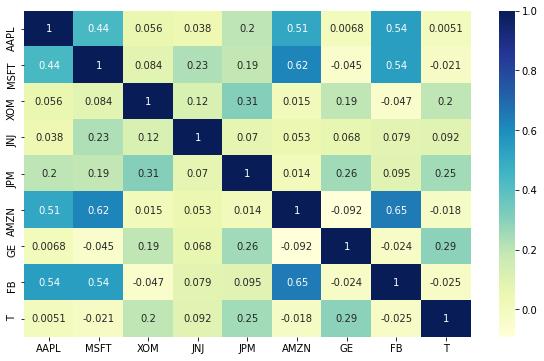

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(StockReturns.iloc[:,:-3].corr(),cmap='YlGnBu',annot = True)

Incredible! Note that Amazon is most correlated with Facebook and Microsoft. The correlation matrix is very useful for a variety of quantitative investment analysis methods.

In [11]:
#Co-variance
StockReturns.iloc[:,:-3].cov()*252
#Annualize the co-variance matrix by multiplying it with 252, the number of trading days in a year.

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


In [12]:
# Calculate the covariance matrix
cov_mat = StockReturns.iloc[:,:-3].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

          AAPL      MSFT       XOM  ...        GE        FB         T
AAPL  0.030996  0.011400  0.001093  ...  0.000236  0.016243  0.000152
MSFT  0.011400  0.021912  0.001392  ... -0.001315  0.013682 -0.000530
XOM   0.001093  0.001392  0.012500  ...  0.004295 -0.000890  0.003751
JNJ   0.000774  0.003899  0.001548  ...  0.001540  0.001545  0.001780
JPM   0.005716  0.004597  0.005554  ...  0.008283  0.002631  0.006972
AMZN  0.018805  0.019275  0.000354  ... -0.003830  0.023290 -0.000638
GE    0.000236 -0.001315  0.004295  ...  0.039270 -0.000821  0.009849
FB    0.016243  0.013682 -0.000890  ... -0.000821  0.028937 -0.000708
T     0.000152 -0.000530  0.003751  ...  0.009849 -0.000708  0.028833

[9 rows x 9 columns]


In [13]:
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

#np.dot(cov_mat_annual, portfolio_weights) cov_mat_annual@portfolio_weights is also fine.
#We are giving weitage to matrix

0.08931417642713807


Well done! This was a monster. The portfolio volatility is 8.93%

## Markowitz Portfolios

- Sharpe ratio:

The Sharpe ratio is a measure of risk-adjusted return.
To calculate the 1966 version of the Sharpe ratio:
<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/sharperatio.JPG?raw=true">

The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, you are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

##The Markowitz Portfolios
- Any point on the efficient frontier is an
optimium portfolio.These two common points are called

1.   MSR: Max Sharpe Ratio portfolio
<p>The maximum Sharpe ratio, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.</p>
2.   GMV: Global Minimum Volatility portfolio
<p>The global minimum volatility portfolio, or GMV portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.</p>

<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/Efffront.JPG?raw=true">

### Choosing a Portfolio
<h2> How do you choose the best Portfolio?</h2>


* Try to pick a portfolio on the bounding edge of the efficient frontier
* Higher return is available if you can stomach higher risk

### Past Performance is Not a Guarantee of Future Returns
Even though a Max Sharpe Ratio portfolio might sound nice, in practice, returns are extremely difficult to predict.



In [14]:
url='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Finance/EfficientFrontierPortfoliosSlim.csv'

In [15]:
RandomPortfolios = pd.read_csv(url)

In [16]:
RandomPortfolios.head()

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473


In [17]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns']-risk_free)/RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


Very good! Bill Sharpe would be proud! The portfolio historical Sharpe ratios range from 0.742 to 2.27.

In [18]:
RandomPortfolios.head()

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility,Sharpe
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565,0.742884
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723,0.758601
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185,0.775170
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958,0.797450
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473,0.806565


In [19]:
# Sort the portfolios by Sharpe ratio
ind_max_sharpe = RandomPortfolios['Sharpe'].argmax()

# Extract the corresponding weights
MSR_weights = RandomPortfolios.iloc[ind_max_sharpe,:-3].values

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:9].mul(MSR_weights, axis=1).sum(axis=1)
CumulativeReturns_MSR = ((1+StockReturns["Portfolio_MSR"]).cumprod()-1)

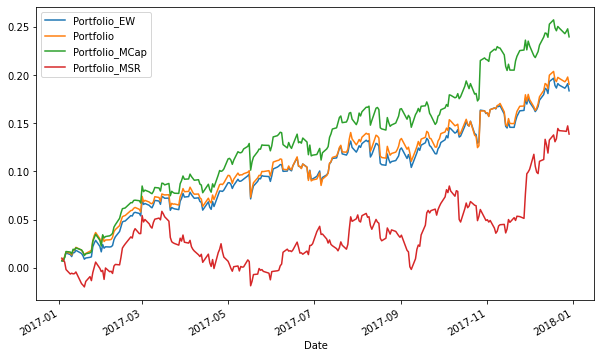

In [20]:
figure =plt.figure(figsize=(10,6))
CumulativeReturns_EW.plot(legend='EW')
CumulativeReturns.plot(legend=True)
CumulativeReturns_MCap.plot(legend=True)
CumulativeReturns_MSR.plot(legend=True)

Yikes! we just optimized your first portfolio - but past performance does not guarantee future results.As shown above!! Returns are harder to predict, making the MSR unstable.

In [21]:
# Sort the portfolios by volatility
ind_min_vol = RandomPortfolios['Volatility'].argmin()

# Extract the corresponding weights
GMV_weights =RandomPortfolios.iloc[ind_max_sharpe,:-3].values

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)
CumulativeReturns_GMV = ((1+StockReturns["Portfolio_GMV"]).cumprod()-1)


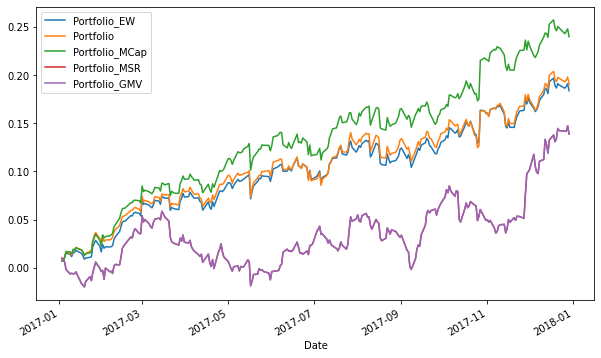

In [22]:
figure =plt.figure(figsize=(10,6))
CumulativeReturns_EW.plot(legend='EW')
CumulativeReturns.plot(legend=True)
CumulativeReturns_MCap.plot(legend=True)
CumulativeReturns_MSR.plot(legend=True)
CumulativeReturns_GMV.plot(legend=True)

Amazing! The GMV portfolio tends to be the most stable optimization over time, but of course you can expect a lower volatility portfolio to have lower return than the benchmark market cap weighting method.

## Factor models
Factor analysis is the practice of using known factors such as the return of large stocks or growth stocks as independent variables in your analysis of portfolio returns, there are many different factor models in use today, Lets start with CAPM
## The Capital Asset Pricing Model
###The Founding Father of Asset Pricing Models

- The Capital Asset Pricing Model is the fundamental building block for many other asset pricing models and factor models in finance

#### Excess Returns
In order to perform a robust analysis on your portfolio returns, you must first subtract the risk-free rate of return from your portfolio returns. The portfolio return minus the risk-free rate of return is known as the Excess Portfolio Return.In the United States, the risk-free rate has been close to 0 since the financial crisis (2008), but this step is crucial for other countries with higher risk-free rates such as Venezuela or Brazil.
* To calculate excess returns, simply subtract the risk free rate of return from your total return:

* Excess Return = Return − Risk Free Return

##C.A.P.M.
- Formula : E(R<sub>p</sub>) − RF = β<sub>p</sub>(E(R<sub>M</sub> ) − RF)
>  E(R<sub>p</sub>) :The excess expected return of a stock or portfolio P <br>
   E(R<sub>M</sub> ) − RF :The excess expected return of the broad market portfolio B<br>
   RF: The regional risk free-rate<br>
  β<sub>p</sub>:  Portfolio beta, or exposure, to the broad market portfolio B

## Calculating Beta Using Co-Variance
Beta is an essential component of many financial models, and is a measure of systematic risk, or exposure to the broad market. In the CAPM model, beta is one of two essential factors.Historical beta can be estimated in a number of ways. you will use the following simple formula involving co-variance and variance to a benchmark market portfolio:
To calculate historical beta using co-variance:<br>
<img src = "https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/betafo.JPG?raw=true">

* β <sub>p</sub>: Portfolio beta
* Cov(R<sub>P</sub>,R<sub>B</sub>) :The co-variance between the portfolio (P) and the benchmark market index (B)
* Var(R<sub>B</sub>) : The variance of the benchmark market index

Note: It might be bit errie, for stats students to see thsi similar formula:<br>
      Beta is slope of the linear regression fit:<br>
      <img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/slopeforJPG.JPG?raw=true">
* filling  the formula of r , we have square of standard dev of x i.e var of x

* Practically, we use linear equatio to solve for coeficients lib such as Sklearn, Scipy

### R-Squared vs Adjusted R-Squared

* R<sup>2</sup> : represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model<br>
100% R<sup>2</sup> is the symptom of overfitting!

* Adj. R<sup>2</sup>: penalize the R<sup>2</sup> for independent variables.




In [23]:
url="https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Finance/FamaFrenchFactors.csv"

In [24]:
FamaFrenchData =pd.read_csv(url)

In [25]:
FamaFrenchData.head()

,Date,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
0,2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
1,2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2,2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
3,2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
4,2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


In [26]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio']-FamaFrenchData['RF']
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)

<Figure size 720x432 with 0 Axes>

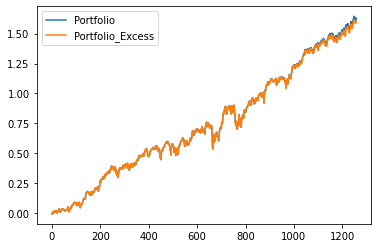

In [27]:
figure =plt.figure(figsize=(10,6))
CumulativeReturns.plot()

Great! Notice how the excess return is only slightly less? That's because the risk free rate has been so low!

In [28]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print(portfolio_beta)

5.7261263381549724e-05
5.8803350882118946e-05
0.9737755165745471


Nice! Your portfolio beta is 0.9738. You can think of market beta as a measure of your exposure to the broad stock market. For every 1.0% rise (or fall) in the market, you can expect your portfolio to rise (fall) roughly 0.97%

In [29]:
#Using statsmodel
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params["Market_Excess"]
print(regression_beta)

0.7942627160017834
0.9737755165745479


In [30]:
CAPM_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Portfolio_Excess   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4854.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:41:13   Log-Likelihood:                 5226.5
No. Observations:                1258   AIC:                        -1.045e+04
Df Residuals:                    1256   BIC:                        -1.044e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0002      0.000      2.009      0.045    5.03e-06       0.000
Market_Excess     0.9738      0.014     69.669      0.000       0.946       1.001
==============================================================================
Omnibus:                      372.020   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3087.179
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                      10.335   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Very good! Your portfolio beta is once again 0.9738. The adjusted r-squared is 0.7943. A high adjusted r-squared (close to 1) means that the majority of your portfolio's movements can be explained by the factors in your model.

## Alpha and Multi-Factor Models
The Fama-French 3 Factor Model: extension to CAPM model<br>
The Fama-French model famously adds two additional factors to the CAPM model to describe asset returns:

<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/famafrench.JPG?raw=true">

### P-Values and Statistical Significance
To test if it is statistically significant, simply examine whether or not it is less than a given threshold, normally 0.05:

### Alpha and the Efficient Market Hypothesis

  
Anyting not explaned by above model is Alpha, Basically an error term!!
- Positive alpha is now popularlaty interpreted as oytperformance due to skill,luck,or timing : Every fund with positive alpha, there is another fund with negative alpha since the weighted sum of all alpha in market must be zero , Beacsuse: The weighted sum of all investors simply equals the market portfolio.

The alpha (α) left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the intercept.

There are two general schools of thought as to why:

- The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the Efficient Market Hypothesis.
- There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.

## FAMA-FRENCH 5 factor model
In 2015, Fama and French extended their previous 3-factor model, adding two
additional factors:
* RMW: Profitability
* CMA: Investment<br>
The RMW factor represents the returns of companies with high operating profitability
versus those with low operating profitability.
The CMA factor represents the returns of companies with aggressive investments
versus those who are more conservative

In [31]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585149


Excellent! The Fama-French 3 factor model fit well, raising the adjusted r-squared from 0.7943 to 0.8194, meaning that the model explains more of your portfolio variance. But there's still room for improvement..

In [32]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.2621515274319268  and is  significant


Great! Your portfolio has a statistically significant negative exposure (-0.2621) to small-cap stocks - in other words - positive exposure to large caps!

In [33]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params["Intercept"]
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
print(portfolio_alpha_annualized)

0.00018326665203183487
0.04726181730280854


In [34]:
# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.836724501922579


Nice! The adjusted r-squared is even higher at 0.8367! Could you build a better model?

- The Fama-French 5 Factor model explains the most variability, so alpha is lower, Correct! But Cliff Assness says this model is not sufficient and that momentum should be taken into account.


# Estimating Tail Risk

#### Estimating Tail Risk
Tail risk is the risk of extreme investment outcomes, most notably on the negative side of a distribution.
* Historical Drawdown
* Value at Risk
* Conditional Value at Risk
* Monte-Carlo Simulation

## Historical Drawdown
The stock market tends to rise over time, but that doesn't mean that you won't have periods of drawdown.Drawdown can be measured as the percentage loss from the highest cumulative historical point the simple formula below to calculate drawdown:


<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/DRAWDOWN.JPG?raw=true" >

## Historical value at risk
Drawdown is a measure of sustained losses over time, but what about simple single-day movements?

Value at Risk, often referred to as VaR, is a way to estimate the risk of a single day negative price movement. VaR can be measured for any given probability, or confidence level, but the most commonly quoted tend to be VaR(95) and VaR(99). Historical VaR is the simplest method to calculate VaR, but relies on historical returns data which may not be a good assumption of the future. Historical VaR(95), for example, represents the minimum loss that your portfolio or asset has sustained in the worst 5% of cases

## Historical expected shortfall

Expected Shortfall, otherwise known as CVaR, or conditional value at risk, is simply the expected loss of the worst case scenarios of returns.For example, if your portfolio has a VaR(95) of -3%, then the CVaR(95) would be the average value of all losses exceeding -3%.

- Empirical Assumptions
Empirical Historical values are those that have actually occurred.
How do you simulate the probability of a value that has never occured historically before?
>  Sample from a probability distribution AkA Parametric Var
## Parametric Var

Value at Risk can also be computed parametrically using a method known as variance/co-variance VaR. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values. You can calculate the parametric VaR(90) using:

## Random Walks
Stochastic or random movements are used in physics to represent particle and fluid movements, in mathematics to describe fractal behavior, and in finance to describe stock market movements.

## Monte Carlo simulations
Monte-Carlo simulations are used to model a wide range of possibilities.

Monte-Carlos can be constructed in many different ways, but all of them involve generating a large number of random variants of a given model, allowing a wide distribution of possible paths to be analyzed. This can allow you to build a comprehensive forecast of possibilities to sample from without a large amount of historical data.

In [35]:
url='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Finance/USO.csv'

In [36]:
USO=pd.read_csv(url,parse_dates=['Date'],usecols=['Date','Adj Close'],index_col='Date')
USO.rename({'Adj Close':'Adjusted'},axis=1,inplace=True)
USO['Returns'] =  USO['Adjusted'].pct_change()
USO['Returns'].dropna(inplace=True)
cum_rets = ((1+USO["Returns"]).cumprod()-1)

Historical Drawdown Code !!! 

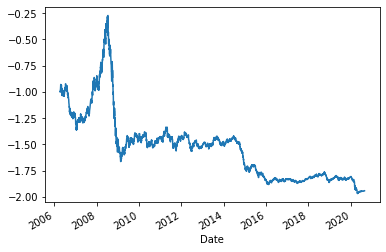

In [37]:
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max<1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

# Plot the results
drawdown.plot()
plt.show()

Historical Var

-3.620608197436547


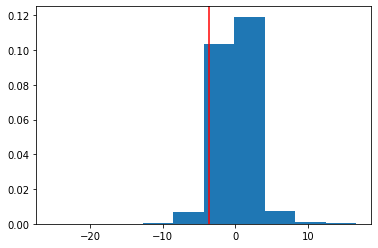

In [38]:
StockReturns_perc = (USO['Returns']*100).values
# Calculate historical VaR(95)
Var_at= 95
var_95 = np.percentile(StockReturns_perc, 100-Var_at)
print(var_95)

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

Very good! Historical VaR(95) = -3.62%

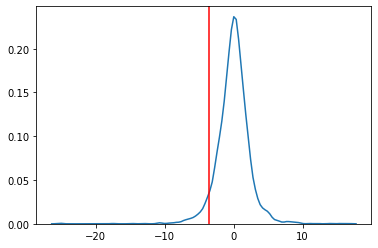

In [39]:
sns.kdeplot(StockReturns_perc)
plt.axvline(x=var_95, color='r')

-5.590735252939497


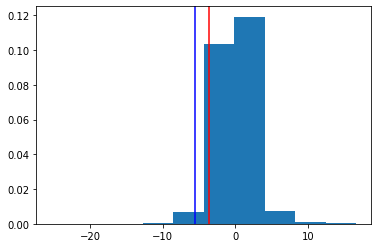

In [40]:
# Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
print(cvar_95)

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density=True)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

Nice! Notice how the CVaR(95) of -5.05% was more extreme than the VaR(95) level?
Changing VaR and CVaR quantiles:
VaR quantiles often used are 90%, 95%, and 99%, corresponding to the worst 10%, 5%, and 1% of cases respectively. These same quantiles are also often used for CVaR. Note that CVaR will always be a more extreme estimate when compared with VaR for the same quantile.

<b>Parametric Var

In [41]:
# Import norm from scipy.stats
from scipy.stats import norm

# Estimate the average daily return
mu = np.mean(StockReturns_perc)

# Estimate the daily volatility
vol = np.std(StockReturns_perc)

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level,mu,vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  -0.050933003057007604 
Volatility:  2.3571711866364593 
VaR(95):  -3.9281345787414947


The parametric VaR(95) is -3.92%.

<b>A random walk simulation</b>
<br>
Use the np.random.normal() function to model random walk movements of the USO oil ETF with a constant daily average return (mu) and average daily volatility (vol) over the course of T trading days.

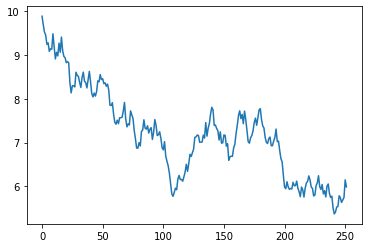

In [42]:
# Set the simulation parameters
mu = np.mean(USO['Returns'])
vol = np.std(USO['Returns'])
T = 252
S0 = 10

# Add one to the random returns
rand_rets =np.random.normal(mu,vol,T)+1

# Forecasted random walk
forecasted_values = S0*(rand_rets.cumprod())

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

<b>Monte Carlo simulations

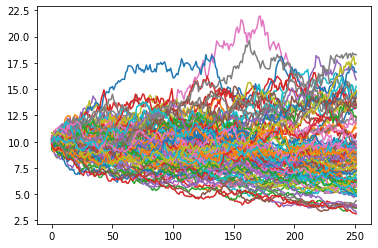

In [43]:
# Loop through 100 simulations
for i in range(0,100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

Both the return values and the Monte-Carlo paths can be used for analysis of everything ranging from option pricing models and hedging to portfolio optimization and trading strategies.

Aggregate the returns data at each iteration, and use the resulting values to forecast parametric VaR(99).

In [44]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns,1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.49 %


25200